In [0]:
import json 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
!wget —no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

--2020-05-28 10:40:39--  http://xn--no-check-certificate-ou2l/
Resolving xn--no-check-certificate-ou2l (xn--no-check-certificate-ou2l)... failed: Name or service not known.
wget: unable to resolve host address ‘xn--no-check-certificate-ou2l’
--2020-05-28 10:40:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-05-28 10:40:39 (101 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]

FINISHED --2020-05-28 10:40:39--
Total wall clock time: 0.1s
Downloaded: 1 files, 5.4M in 0.05s (101 MB/s)


In [0]:
#hyper parameters
vocab_size=10000
embedding_dim=16
max_length=120
truncate_type="post"
padding_type="post"
oov_tokn="<OOV>"
training_size=20000


In [0]:
with open("sarcasm.json", 'r') as f:
  datastore=json.load(f)

sentences=[]
labels =[]  

for item in datastore:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])
 


In [0]:
training_sentences=sentences[0:training_size]
training_labels=labels[0:training_size]

testing_sentences=sentences[training_size:]
testing_labels=labels[training_size:]

In [0]:
#tokenizer instance
tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tokn)

#tokenizer fit on the sequences
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

# training sequence or padding
sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

# training sequence or padding
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

In [0]:
# now comes the time of neural networks
model=tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(50, activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid")

])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                850       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 160,901
Trainable params: 160,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
import numpy as np

training_padded=np.array(training_padded)
training_labels=np.array(training_labels)

testing_padded=np.array(testing_padded)
testing_labels=np.array(testing_labels)


In [0]:
num_epochs=50
history=model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/50
625/625 [==============================] - 3s 4ms/step - loss: 0.6701 - accuracy: 0.5791 - val_loss: 0.5915 - val_accuracy: 0.6931
Epoch 2/50
625/625 [==============================] - 3s 4ms/step - loss: 0.4314 - accuracy: 0.8253 - val_loss: 0.3808 - val_accuracy: 0.8402
Epoch 3/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3068 - accuracy: 0.8758 - val_loss: 0.3559 - val_accuracy: 0.8492
Epoch 4/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2583 - accuracy: 0.8987 - val_loss: 0.3446 - val_accuracy: 0.8571
Epoch 5/50
625/625 [==============================] - 3s 4ms/step - loss: 0.2219 - accuracy: 0.9139 - val_loss: 0.3556 - val_accuracy: 0.8524
Epoch 6/50
625/625 [==============================] - 3s 4ms/step - loss: 0.1992 - accuracy: 0.9223 - val_loss: 0.3568 - val_accuracy: 0.8518
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.1728 - accuracy: 0.9344 - val_loss: 0.3653 - val_accuracy: 0.8533
Epoch 

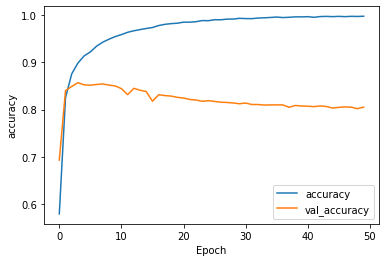

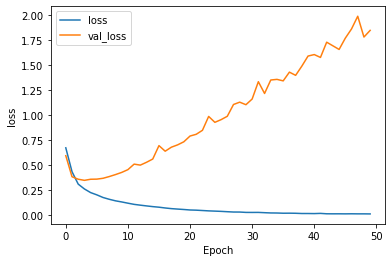

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epoch")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history,"loss")